In [2]:
#One time installs  - On AWS useconda_pytorch_p38 environment and add using ml.g4dn.2xlarge for this notebook

# !pip install librosa
# !pip install fastbook
# !pip install gradio

In [3]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.all import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import librosa
import librosa.display
import numpy as np
from pathlib import Path
import os
import random
import IPython
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import gradio as gr

from collections import OrderedDict

Matplotlib is building the font cache; this may take a moment.


##### Labelling function from the file name lookup as a dictionary

In [49]:
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')  #classification information across folds as provided from Urbansounds
df['fname'] = df[['slice_file_name','fold']].apply (lambda x: str(x['slice_file_name'][:-4])+'.png'.strip(),axis=1 )
my_dict = dict(zip(df.fname,df['class']))
def label_func(f_name):
    f_name = str(f_name).split('/')[-1:][0]
    return my_dict[f_name]

Text(0.5, 1.0, 'Files in each fold')

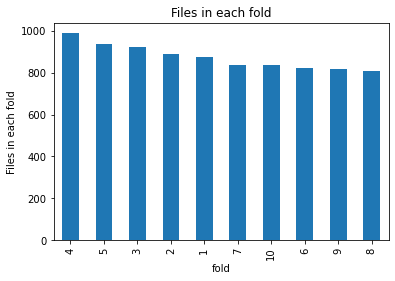

In [5]:
df.groupby(['fold']).classID.count().sort_values(ascending=False).plot.bar()
plt.ylabel('Files in each fold')
plt.title('Files in each fold')

In [6]:
all_folds = list(np.arange(1,11))
all_folders = [str(i) for i in all_folds]

In [7]:
image_files_loc = 'UrbanSoundTransforms/mel_spectrogram/'
all_files = get_image_files(image_files_loc,recurse=True, folders =all_folders )


In [8]:
dblock = DataBlock(blocks=(ImageBlock,CategoryBlock),
                   get_y     = label_func,
                   splitter  = RandomSplitter(seed=1),
                   
                  )
dl = dblock.dataloaders(all_files)
print ('Train has {0} images and test has {1} images.' .format(len(dl.train_ds),len(dl.valid_ds)))
learn = vision_learner(dl, resnet34, metrics=accuracy)
learn.fine_tune(3)

Train has 6986 images and test has 1746 images.


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/ec2-user/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.462791,0.710250,0.775487,01:12


epoch,train_loss,valid_loss,accuracy,time
0,0.600056,0.309964,0.892325,00:40
1,0.260431,0.200901,0.945017,00:39
2,0.090158,0.164748,0.950745,00:40


In [11]:
learn.export()